# Feature Engineering

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [2]:
# Loading the dataset
df = pd.read_csv("datasets/cleaned_data2.csv", index_col=0)

In [3]:
print(df.shape, "\n")
df.head()

(129778, 42) 



,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,number_of_at_in_url,number_of_dollar_in_url,number_of_exclamation_in_url,number_of_hashtag_in_url,number_of_percent_in_url,domain_length,number_of_dots_in_domain,number_of_hyphens_in_domain,having_special_characters_in_domain,number_of_special_characters_in_domain,having_digits_in_domain,number_of_digits_in_domain,having_repeated_digits_in_domain,number_of_subdomains,having_dot_in_subdomain,having_hyphen_in_subdomain,average_subdomain_length,average_number_of_dots_in_subdomain,average_number_of_hyphens_in_subdomain,having_special_characters_in_subdomain,number_of_special_characters_in_subdomain,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,0,0,0,0,0,0,12,2,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,0,0,0,0,0,0,26,5,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,1,0,0,0,0,0,21,2,0,0,0,1,6,0,2,0,0,7.0,0,0,1,3,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,0,0,0,0,0,0,15,2,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,0,0,0,0,0,0,16,3,0,0,0,0,0,0,2,0,0,3.0,0,0,1,3,0,0,1,0,3,0,0,0,4.103538,2.952820


In [4]:
# df["URL_Type_obf_Type"].value_counts().index.tolist()

## Encoding the dependent variable

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# import pickle

In [5]:
# Encoding the "URL_Type_obf_Type" column
# encoder = LabelEncoder()
# df["URL_Type_obf_Type"] = encoder.fit_transform(df["URL_Type_obf_Type"])

In [6]:
# class_mapping = {}
# for i, cls in enumerate(encoder.classes_):
#     class_mapping[cls] = i

# class_mapping

In [7]:
# Save the encoder
# with open("encoders/label_encoder.pkl", "wb") as file:
#     pickle.dump(encoder, file)

## Splitting the dataset into training and test sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Separating the data into features and labels
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [10]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [11]:
print("Train data shape:\nFeatures:{}\nLabel:{}".format(X_train.shape, y_train.shape))
print("\nTest data shape:\nFeatures:{}\nLabel:{}".format(X_test.shape, y_test.shape))

Train data shape:
Features:(103822, 41)
Label:(103822,)

Test data shape:
Features:(25956, 41)
Label:(25956,)


## Model Training: Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
model = RandomForestClassifier(n_estimators=25, random_state=42)

In [14]:
# Training the model on the training set
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=42)

## Evaluating the model perfomance

In [15]:
# Evaluating the performance of the model
preds = model.predict(X_test)

In [16]:
accuracy = accuracy_score(y_test, preds)
print("Model Test Set Accuracy: {:.4f}".format(accuracy))

Model Test Set Accuracy: 0.9048


In [17]:
print("Model Training set Accuracy: {:.4f}".format( accuracy_score(y_train, model.predict(X_train))))

Model Training set Accuracy: 0.9973


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
print("Classification Report:\n\n", classification_report(y_test, preds))

Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.92      0.91     13354
           1       0.91      0.89      0.90     12602

    accuracy                           0.90     25956
   macro avg       0.91      0.90      0.90     25956
weighted avg       0.91      0.90      0.90     25956



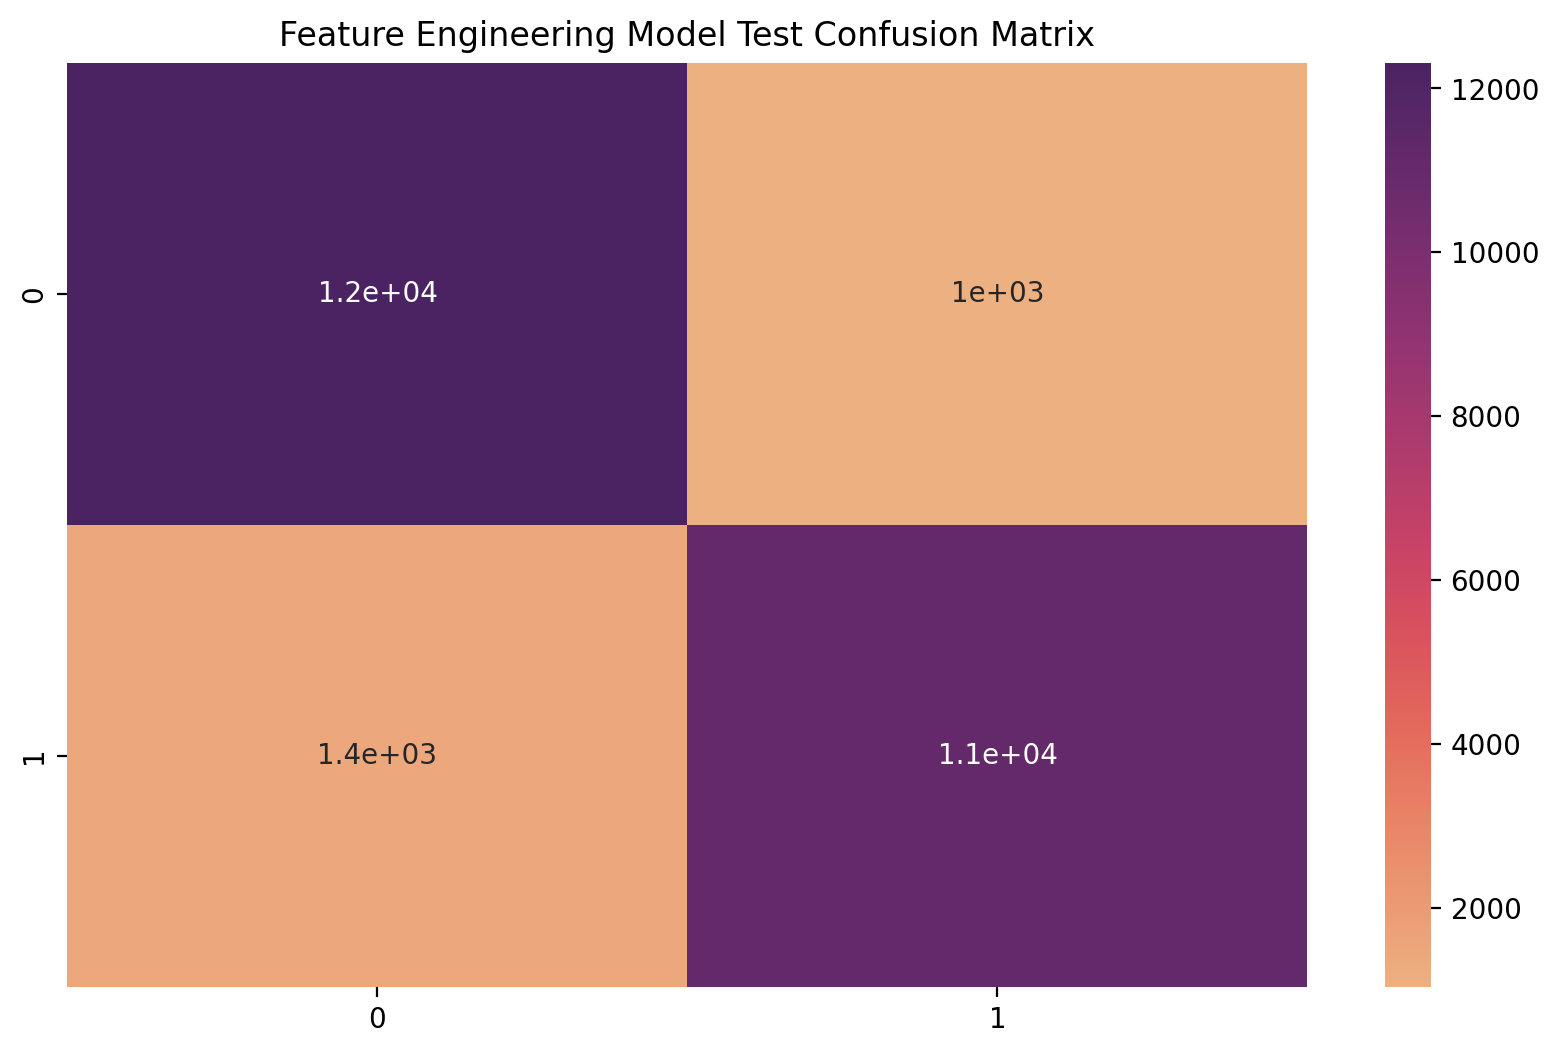

In [20]:
# Getting the confusion matrix for the model's performance
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(
    confusion_matrix(y_test, preds),
    annot=True,
    # xticklabels=class_mapping.keys(),
    # yticklabels=class_mapping.keys(),
    cmap="flare"
)
plt.title("Feature Engineering Model Test Confusion Matrix")
# plt.savefig("./plots/feature_engineering_confusion_matrix")
plt.show()

### Selecting the best features

In [41]:
# Getting the relevant features from the model
feature_importances = pd.Series(model.feature_importances_, index=df.columns[1:])
top_20_features = feature_importances.sort_values(ascending=False).head(20)

top_20_features

url_length                          0.145953
average_subdomain_length            0.120542
entropy_of_domain                   0.098398
entropy_of_url                      0.096580
domain_length                       0.091029
number_of_digits_in_domain          0.054062
number_of_subdomains                0.052945
number_of_dots_in_url               0.044972
number_of_digits_in_url             0.043385
number_of_special_char_in_url       0.038038
number_of_slash_in_url              0.037412
number_of_dots_in_domain            0.027834
path_length                         0.026633
number_of_hyphens_in_domain         0.019989
number_of_hyphens_in_url            0.018709
having_digits_in_domain             0.014339
having_repeated_digits_in_domain    0.011479
number_of_digits_in_subdomain       0.009786
number_of_questionmark_in_url       0.006695
having_digits_in_subdomain          0.006676
dtype: float64

#### -> Selecting the features that have an importance of up to 1% and above

In [42]:
threshold = 0.001
selected_features = feature_importances[feature_importances > threshold]

In [43]:
print("Total number of selected features: {}".format(len(selected_features)))

Total number of selected features: 28


In [44]:
# Saving the seleced features data to a json file
selected_features.to_json("selected_features.json")

In [45]:
features_list = [*selected_features.index, "Type"]
print(features_list)

['url_length', 'number_of_dots_in_url', 'having_repeated_digits_in_url', 'number_of_digits_in_url', 'number_of_special_char_in_url', 'number_of_hyphens_in_url', 'number_of_underline_in_url', 'number_of_slash_in_url', 'number_of_questionmark_in_url', 'number_of_equal_in_url', 'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain', 'number_of_hyphens_in_domain', 'having_special_characters_in_domain', 'number_of_special_characters_in_domain', 'having_digits_in_domain', 'number_of_digits_in_domain', 'having_repeated_digits_in_domain', 'number_of_subdomains', 'average_subdomain_length', 'number_of_special_characters_in_subdomain', 'having_digits_in_subdomain', 'number_of_digits_in_subdomain', 'path_length', 'having_query', 'entropy_of_url', 'entropy_of_domain', 'Type']


In [46]:
# Creating a dataset with the selected features
selected_features_df = df[features_list]

In [49]:
selected_features_df

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,number_of_percent_in_url,domain_length,number_of_dots_in_domain,number_of_hyphens_in_domain,having_special_characters_in_domain,number_of_special_characters_in_domain,having_digits_in_domain,number_of_digits_in_domain,having_repeated_digits_in_domain,number_of_subdomains,average_subdomain_length,number_of_special_characters_in_subdomain,having_digits_in_subdomain,number_of_digits_in_subdomain,path_length,having_query,entropy_of_url,entropy_of_domain,Type
0,37,2,0,0,8,0,0,5,0,0,0,12,2,0,0,0,0,0,0,2,3.0,3,0,0,3,0,4.010412,2.751629,0
1,70,5,0,0,12,0,0,6,0,0,0,26,5,0,0,0,0,0,0,2,3.0,3,0,0,4,0,4.089470,3.532573,1
2,42,2,0,6,8,0,0,3,1,1,0,21,2,0,0,0,1,6,0,2,7.0,3,0,0,1,1,4.386016,3.344698,0
3,46,2,0,0,7,0,0,4,0,0,0,15,2,0,0,0,0,0,0,2,3.0,3,0,0,2,0,4.221947,3.189898,0
4,51,3,0,0,9,0,0,5,0,0,0,16,3,0,0,0,0,0,0,2,3.0,3,0,0,3,0,4.103538,2.952820,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247920,24,1,1,3,6,1,0,3,0,0,0,9,1,1,0,0,1,3,1,1,6.0,3,1,3,1,0,3.970176,2.947703,1
247926,74,2,0,0,13,5,0,5,0,0,0,21,2,5,0,0,0,0,0,2,3.0,3,0,0,3,0,4.140442,3.558519,0
247928,75,3,0,5,12,5,0,3,0,0,0,23,3,5,0,0,1,5,0,2,10.0,3,0,0,1,0,4.450151,3.849224,0
247934,68,5,0,1,12,1,0,5,0,0,0,33,5,1,0,0,1,1,0,5,8.0,3,0,0,3,0,4.194153,3.942439,1


## Saving the feature selected dataset and feature engineering model

In [50]:
import pickle

In [51]:
# Saving the model
with open("models/feature_engineering_rf.pkl", "wb") as file:
    pickle.dump(model, file)

In [52]:
# Saving the dataset with the selected features
selected_features_df.to_csv("datasets/feature_selected_data2.csv")